<a href="https://colab.research.google.com/github/MattyGraham10/test/blob/main/final_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [198]:
df = pd.read_csv('/content/Vodafone_Customer_Churn_Sample_Dataset.csv')

In [199]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [200]:
print(df.info())
print(df.shape)
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [201]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors = 'coerce')
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [202]:
df = df.dropna(subset=['TotalCharges'])


In [203]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors = 'coerce')
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [204]:
print(df.isnull().values.any())

False


In [205]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [206]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [207]:
# Select only object or category dtype columns
categorical_cols = df.select_dtypes(include=['object', 'category'])

# Count unique entries per column
unique_counts = categorical_cols.nunique()

print(unique_counts)


gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64


In [208]:
for col in categorical_cols.columns:
    print(f"\nColumn: {col}")
    print(f"Unique count: {categorical_cols[col].nunique()}")
    print(f"Unique values: {categorical_cols[col].unique()}")



Column: gender
Unique count: 2
Unique values: ['Female' 'Male']

Column: Partner
Unique count: 2
Unique values: ['Yes' 'No']

Column: Dependents
Unique count: 2
Unique values: ['No' 'Yes']

Column: PhoneService
Unique count: 2
Unique values: ['No' 'Yes']

Column: MultipleLines
Unique count: 3
Unique values: ['No phone service' 'No' 'Yes']

Column: InternetService
Unique count: 3
Unique values: ['DSL' 'Fiber optic' 'No']

Column: OnlineSecurity
Unique count: 3
Unique values: ['No' 'Yes' 'No internet service']

Column: OnlineBackup
Unique count: 3
Unique values: ['Yes' 'No' 'No internet service']

Column: DeviceProtection
Unique count: 3
Unique values: ['No' 'Yes' 'No internet service']

Column: TechSupport
Unique count: 3
Unique values: ['No' 'Yes' 'No internet service']

Column: StreamingTV
Unique count: 3
Unique values: ['No' 'Yes' 'No internet service']

Column: StreamingMovies
Unique count: 3
Unique values: ['No' 'Yes' 'No internet service']

Column: Contract
Unique count: 3
Unique

In [209]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numeric_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


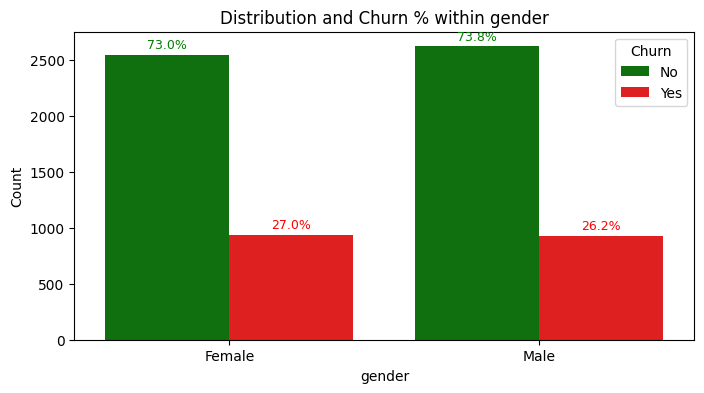

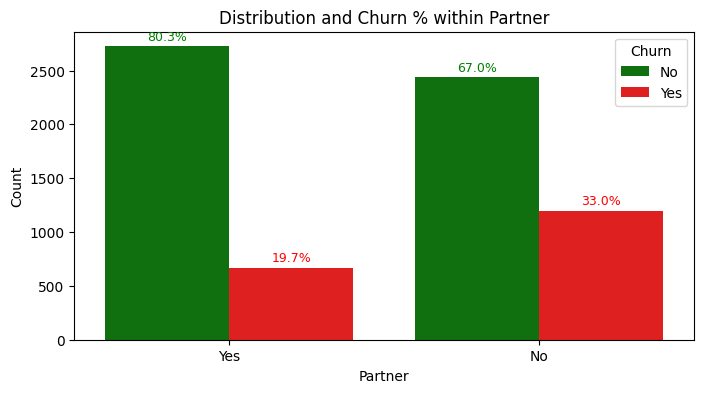

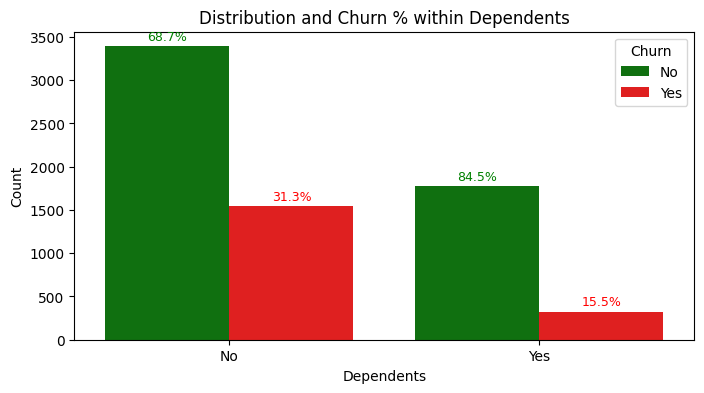

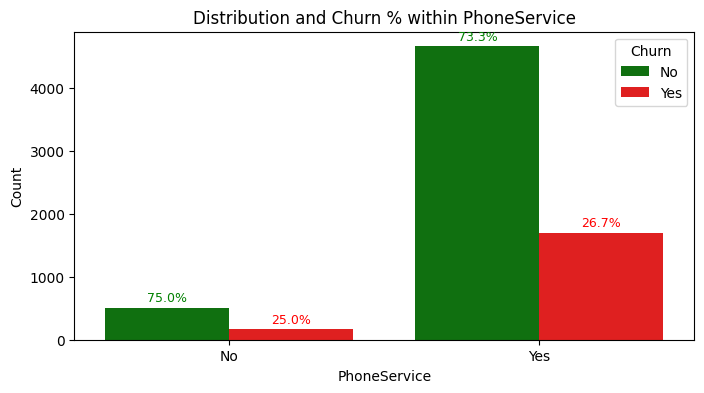

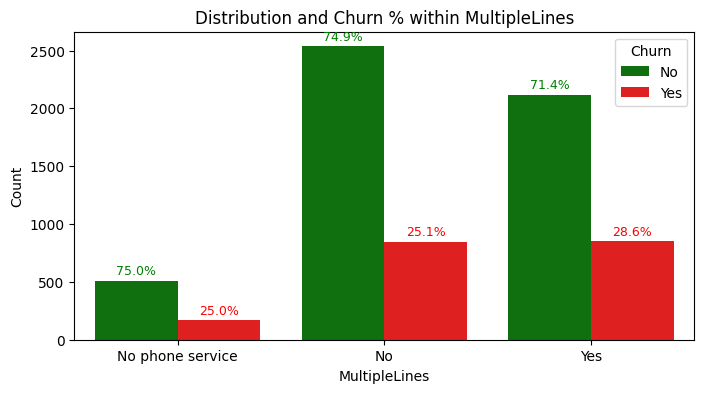

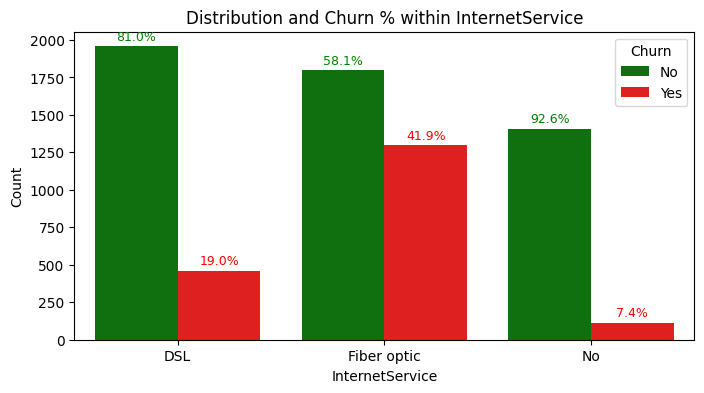

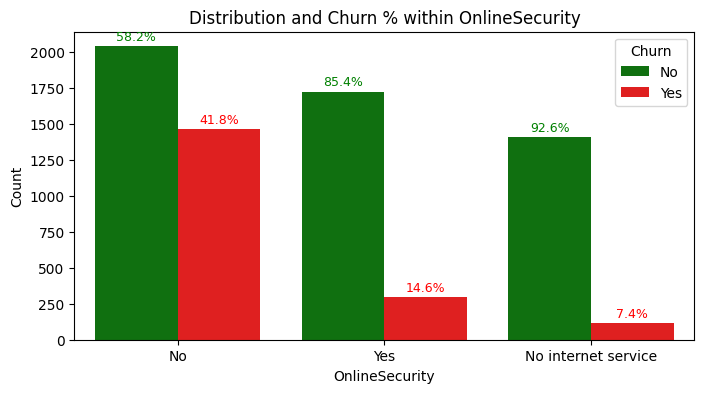

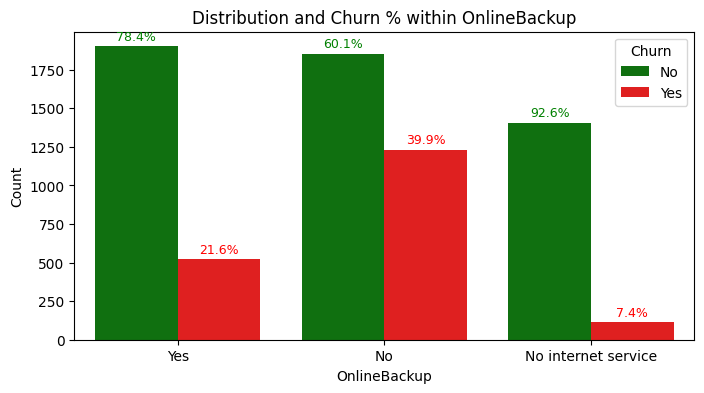

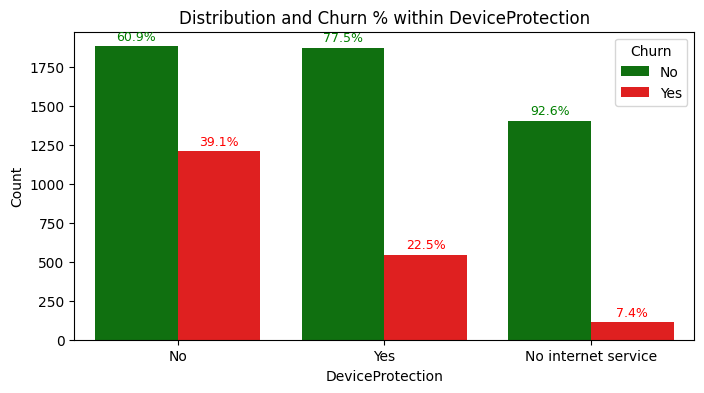

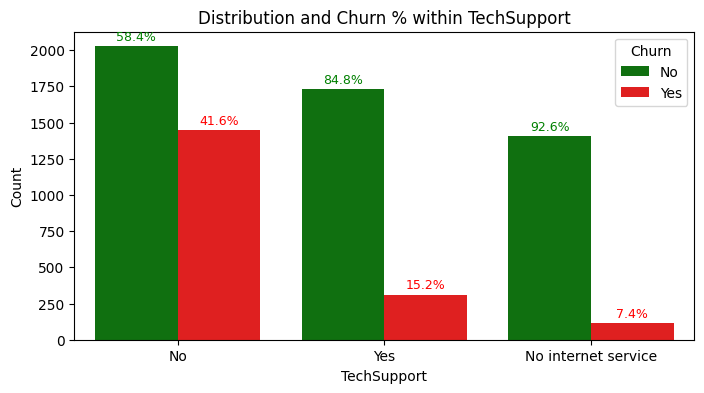

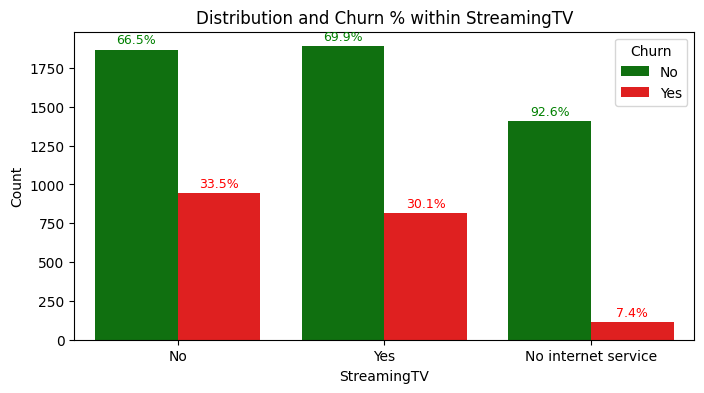

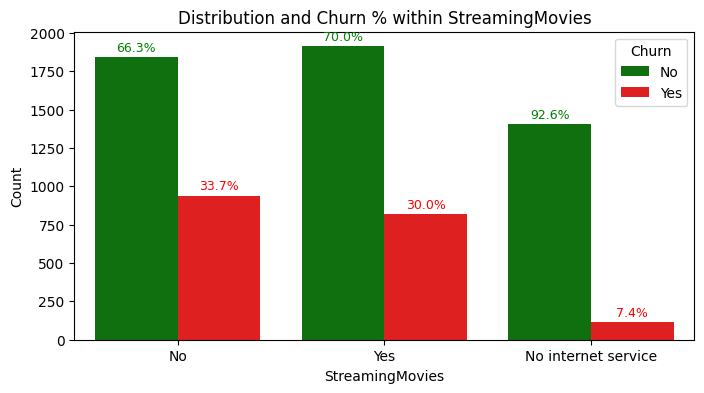

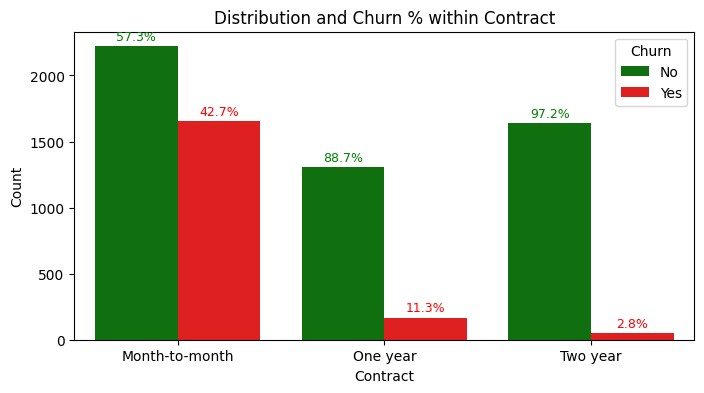

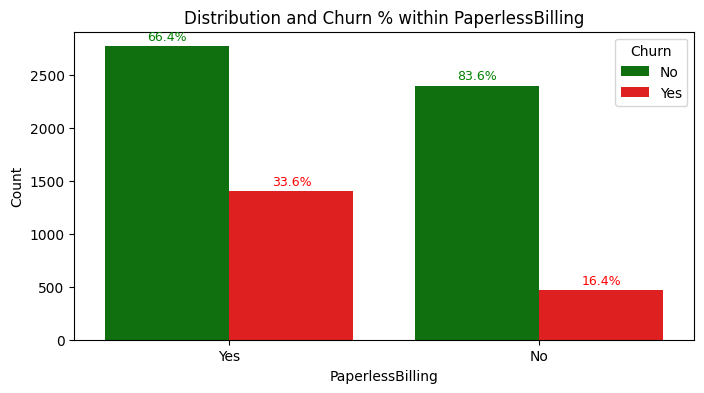

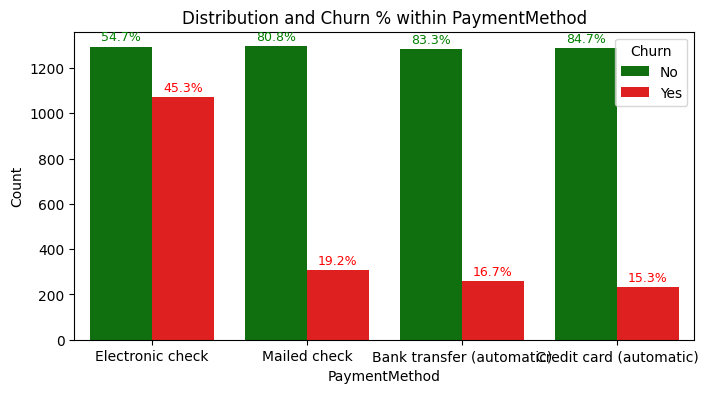

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

palette = {'No': 'green', 'Yes': 'red'}

for col in categorical_cols.columns:
    if col == 'Churn':
        continue  # skip churn column itself

    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=df, x=col, hue='Churn', palette=palette)

    categories = [tick.get_text() for tick in ax.get_xticklabels()]
    churn_classes = [t.get_text() for t in ax.legend_.get_texts()]
    n_hue = len(churn_classes)

    counts = df.groupby([col, 'Churn']).size().unstack(fill_value=0)
    total_per_cat = counts.sum(axis=1)
    churn_pct = counts.divide(total_per_cat, axis=0) * 100

    cluster_width = 0.8
    bar_width = cluster_width / n_hue

    tick_positions = [tick.get_position()[0] for tick in ax.get_xticklabels()]

    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2
        height = p.get_height()

        if height == 0:
            continue

        category_index = int(np.argmin(np.abs(np.array(tick_positions) - x)))

        cluster_start = tick_positions[category_index] - cluster_width / 2
        relative_x = x - cluster_start

        hue_index = int(np.floor(relative_x / bar_width))
        if hue_index >= n_hue or category_index >= len(categories):
            continue

        category = categories[category_index]
        churn_class = churn_classes[hue_index]

        pct = churn_pct.loc[category, churn_class]

        color = palette[churn_class]  # use same color as bars

        ax.text(x, height + max(ax.get_ylim()) * 0.01, f'{pct:.1f}%',
                ha='center', va='bottom', fontsize=9, color=color)

    plt.title(f'Distribution and Churn % within {col}')
    plt.ylabel('Count')
    plt.show()


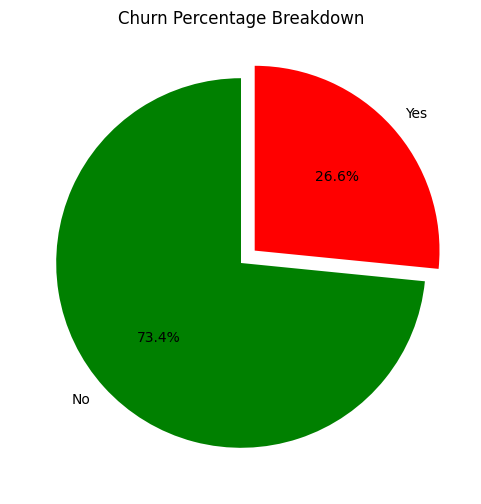

In [211]:
plt.figure(figsize=(6,6))
df['Churn'].value_counts().plot.pie(
    autopct='%1.1f%%', colors=['green', 'red'], startangle=90,
    labels=['No', 'Yes'], explode=[0, 0.1]
)
plt.title('Churn Percentage Breakdown')
plt.ylabel('')  # Hide y-label for cleaner look
plt.show()


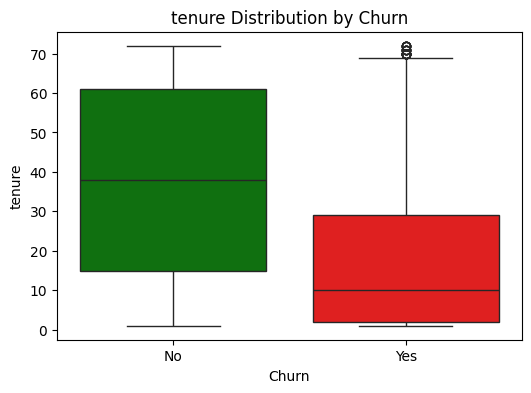

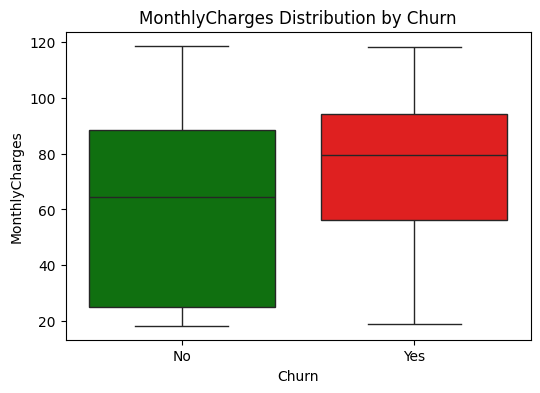

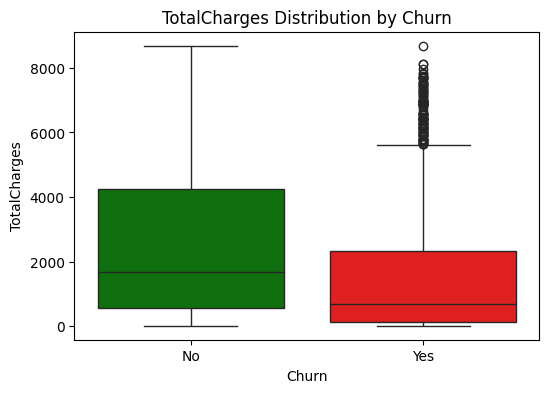

In [212]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Churn', y=col, palette={'No': 'green', 'Yes': 'red'})
    plt.title(f'{col} Distribution by Churn')
    plt.show()


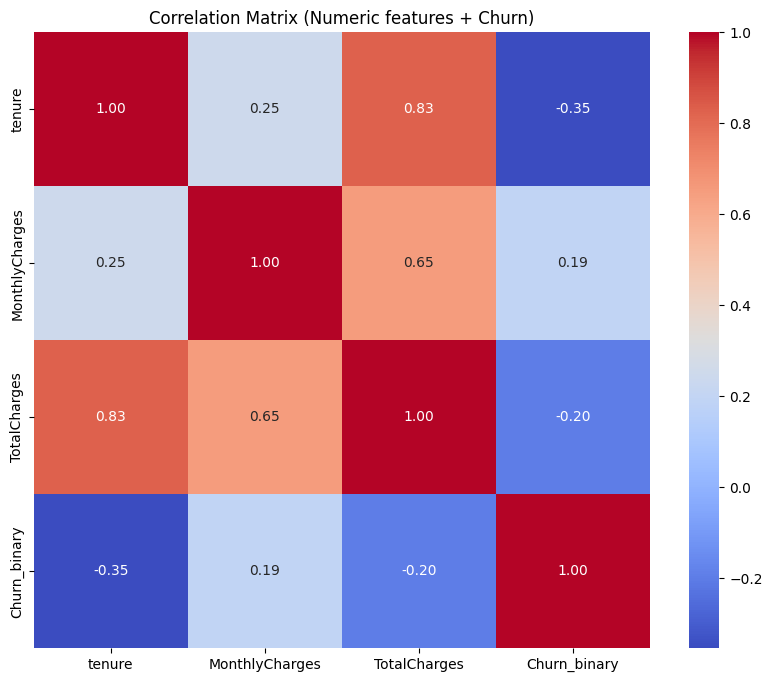

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

# Encode churn as binary
df['Churn_binary'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Select numeric columns + churn binary
cols_for_corr = numeric_cols + ['Churn_binary']

# Calculate correlation matrix
corr_matrix = df[cols_for_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix (Numeric features + Churn)')
plt.show()


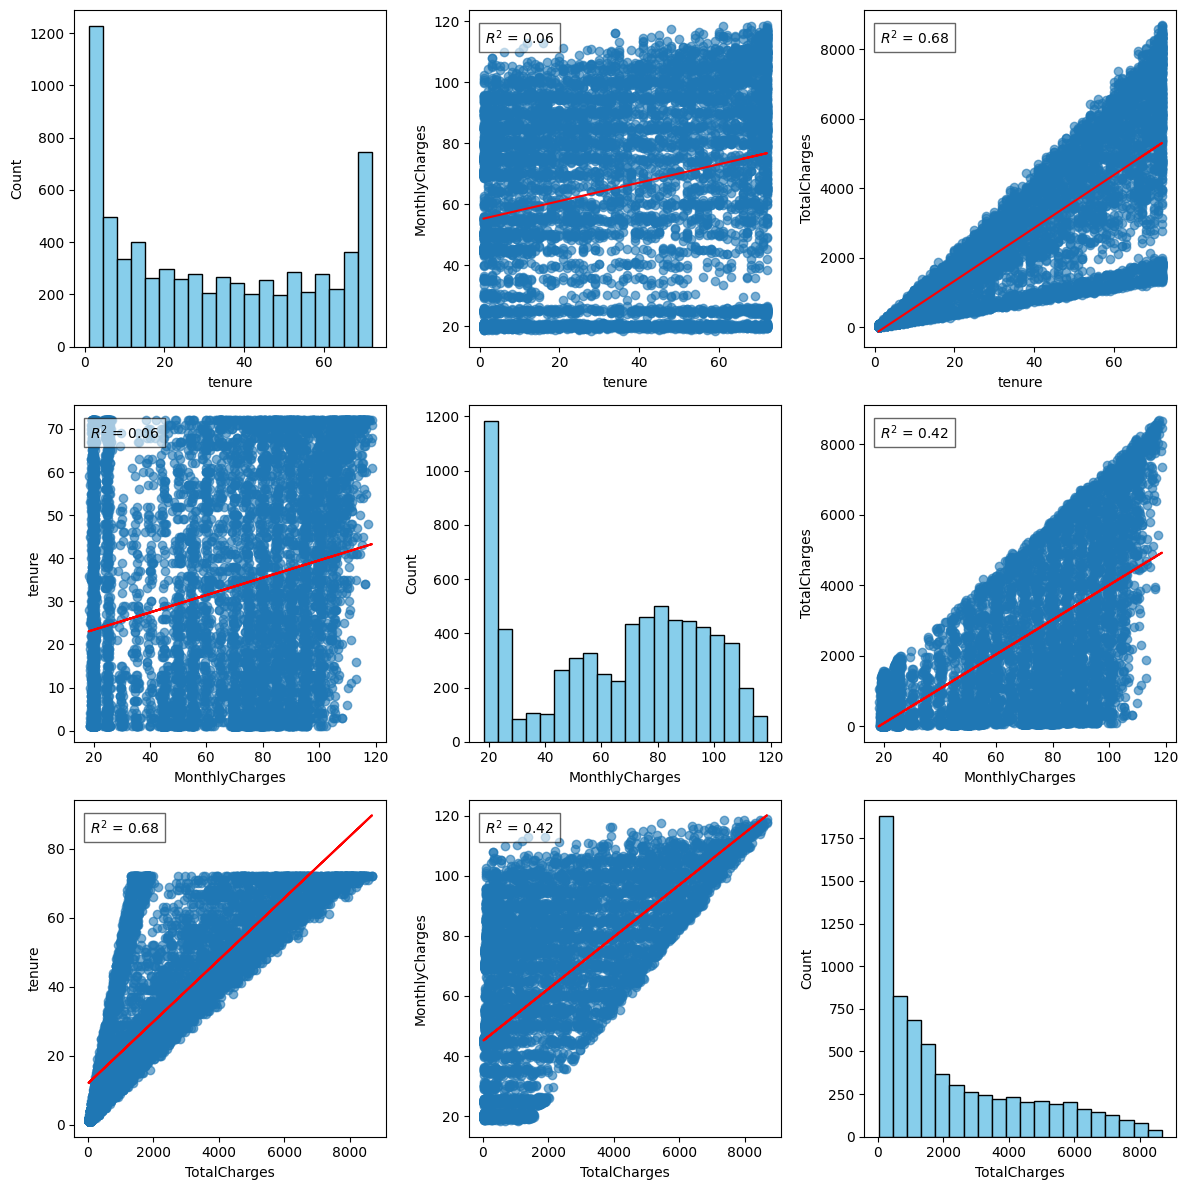

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

def plot_scatter_with_r2(x, y, ax):
    # Scatter plot
    ax.scatter(x, y, alpha=0.6)

    # Fit linear model
    x_reshaped = x.values.reshape(-1, 1)
    y_values = y.values
    model = LinearRegression().fit(x_reshaped, y_values)
    y_pred = model.predict(x_reshaped)

    # Plot regression line
    ax.plot(x, y_pred, color='red')

    # Compute R^2
    r2 = model.score(x_reshaped, y_values)

    # Annotate R^2
    ax.text(0.05, 0.9, f'$R^2$ = {r2:.2f}', transform=ax.transAxes, fontsize=10,
            bbox=dict(facecolor='white', alpha=0.6))

    ax.set_xlabel(x.name)
    ax.set_ylabel(y.name)

# Plot all pairwise combinations
num_cols = len(numeric_cols)
fig, axs = plt.subplots(num_cols, num_cols, figsize=(4*num_cols, 4*num_cols))

for i, col_x in enumerate(numeric_cols):
    for j, col_y in enumerate(numeric_cols):
        ax = axs[i, j]
        if i == j:
            # Diagonal: histogram
            ax.hist(df[col_x], bins=20, color='skyblue', edgecolor='black')
            ax.set_xlabel(col_x)
            ax.set_ylabel('Count')
        else:
            plot_scatter_with_r2(df[col_x], df[col_y], ax)

plt.tight_layout()
plt.show()


In [215]:
for col in categorical_cols.columns:
    print(f"Column: {col}")
    value_counts = df[col].value_counts(normalize=True) * 100
    for val, pct in value_counts.items():
        print(f"  {val}: {pct:.2f}%")
    print()  # blank line for readability


Column: gender
  Male: 50.47%
  Female: 49.53%

Column: Partner
  No: 51.75%
  Yes: 48.25%

Column: Dependents
  No: 70.15%
  Yes: 29.85%

Column: PhoneService
  Yes: 90.33%
  No: 9.67%

Column: MultipleLines
  No: 48.14%
  Yes: 42.19%
  No phone service: 9.67%

Column: InternetService
  Fiber optic: 44.03%
  DSL: 34.36%
  No: 21.62%

Column: OnlineSecurity
  No: 49.73%
  Yes: 28.65%
  No internet service: 21.62%

Column: OnlineBackup
  No: 43.90%
  Yes: 34.49%
  No internet service: 21.62%

Column: DeviceProtection
  No: 44.00%
  Yes: 34.39%
  No internet service: 21.62%

Column: TechSupport
  No: 49.37%
  Yes: 29.01%
  No internet service: 21.62%

Column: StreamingTV
  No: 39.95%
  Yes: 38.44%
  No internet service: 21.62%

Column: StreamingMovies
  No: 39.55%
  Yes: 38.84%
  No internet service: 21.62%

Column: Contract
  Month-to-month: 55.11%
  Two year: 23.96%
  One year: 20.93%

Column: PaperlessBilling
  Yes: 59.27%
  No: 40.73%

Column: PaymentMethod
  Electronic check: 33.63%

In [216]:
binary_cols = [
    "gender", "Partner", "Dependents", "PhoneService", "PaperlessBilling"
]

multi_cat_cols = [
    "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
    "PaymentMethod"
]

ordinal_cols = ["Contract"]


In [217]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

class BinaryMapper(BaseEstimator, TransformerMixin):
    def __init__(self, mapping_dict):
        self.mapping_dict = mapping_dict

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for col, mapping in self.mapping_dict.items():
            X[col] = X[col].map(mapping)
        return X

    # Add this method:
    def get_feature_names_out(self, input_features=None):
        # Just return the columns as they are
        if input_features is not None:
            return input_features
        else:
            # fallback if no input_features passed
            return list(self.mapping_dict.keys())

# Define your column groups
binary_cols = ["gender", "Partner", "Dependents", "PhoneService", "PaperlessBilling"]
multi_cat_cols = [
    "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaymentMethod"
]
ordinal_cols = ["Contract"]
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]  # Replace with your numeric columns

# Define binary mappings
binary_mappings = {
    "gender": {"Male": 0, "Female": 1},
    "Partner": {"No": 0, "Yes": 1},
    "Dependents": {"No": 0, "Yes": 1},
    "PhoneService": {"No": 0, "Yes": 1},
    "PaperlessBilling": {"No": 0, "Yes": 1}
}

# Ordinal encoding order for 'Contract'
contract_categories = [["Month-to-month", "One year", "Two year"]]

# Build the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("binary", BinaryMapper(binary_mappings), binary_cols),
        ("multi_cat", OneHotEncoder(handle_unknown="ignore"), multi_cat_cols),
        ("contract_ord", OrdinalEncoder(categories=contract_categories), ordinal_cols),
        ("num_scaler", StandardScaler(), numeric_cols)
    ],
    remainder="drop"  # Drop any other columns not specified
)


In [218]:
from sklearn.model_selection import train_test_split

# Assuming your data is in a DataFrame called df, and target column is 'Churn'
X = df.drop(columns=['Churn'])
y = df['Churn'].map({'No': 0, 'Yes': 1})  # Encode churn target as 0/1

# # Split into train and validation (e.g., 80/20 split)
# X_train, X_val, y_train, y_val = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

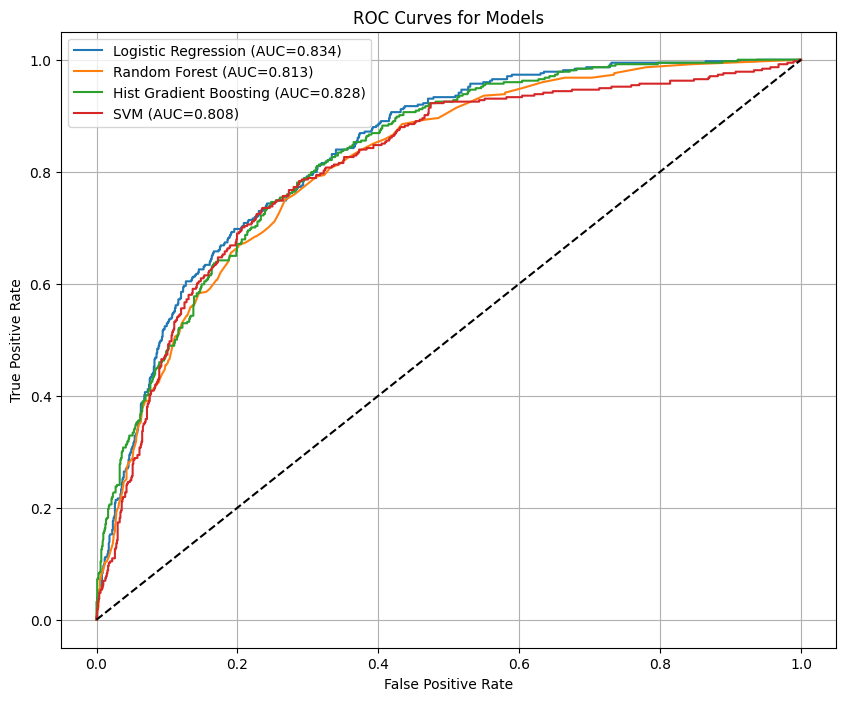

Logistic Regression: Accuracy=0.7242, Precision=0.4885, Recall=0.7941, F1=0.6049, ROC-AUC=0.8342


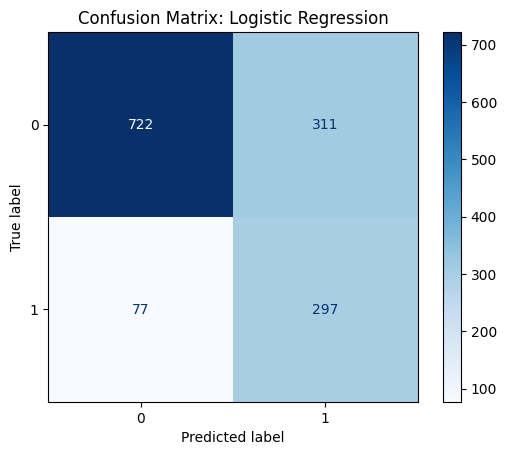

Random Forest: Accuracy=0.7818, Precision=0.6192, Recall=0.4652, F1=0.5313, ROC-AUC=0.8133


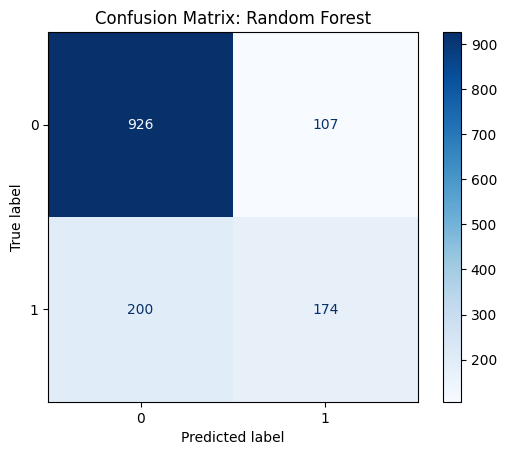

Hist Gradient Boosting: Accuracy=0.7854, Precision=0.6111, Recall=0.5294, F1=0.5673, ROC-AUC=0.8281


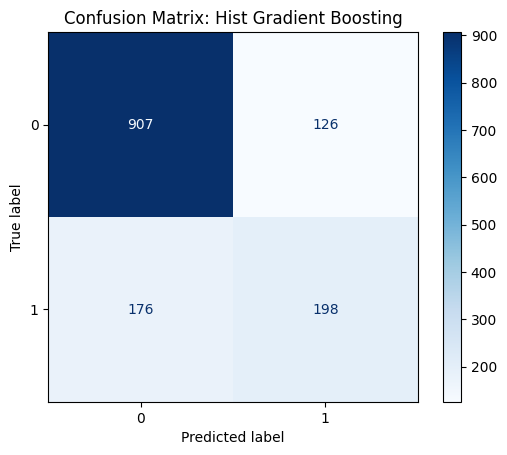

SVM: Accuracy=0.7306, Precision=0.4958, Recall=0.7807, F1=0.6064, ROC-AUC=0.8081


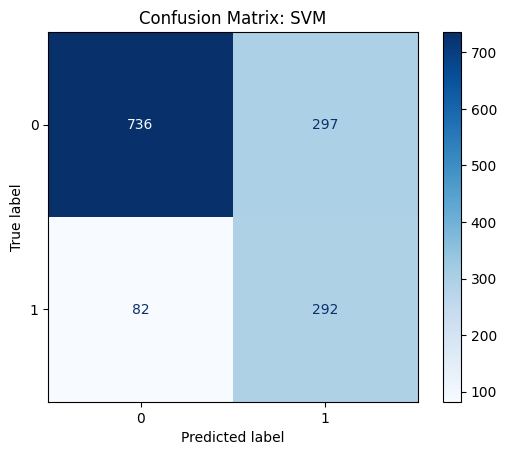

In [219]:
from sklearn.model_selection import train_test_split

# Assuming your data is in a DataFrame called df, and target column is 'Churn'
X = df.drop(columns=['Churn'])
y = df['Churn'].map({'No': 0, 'Yes': 1})  # Encode churn target as 0/1

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

results = []

plt.figure(figsize=(10, 8))

for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessing", preprocessor),
        ("classifier", model)
    ])
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_val)
    probas = pipeline.predict_proba(X_val)[:, 1]

    acc = accuracy_score(y_val, preds)
    prec = precision_score(y_val, preds)
    rec = recall_score(y_val, preds)
    f1 = f1_score(y_val, preds)
    auc = roc_auc_score(y_val, probas)

    results.append((name, acc, prec, rec, f1, auc))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_val, probas)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

plt.plot([0, 1], [0, 1], "k--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Models")
plt.legend()
plt.grid(True)
plt.show()

# Print all metrics and plot confusion matrices
for name, acc, prec, rec, f1, auc in results:
    print(f"{name}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}, ROC-AUC={auc:.4f}")

    # Fit again to get predictions (or reuse pipeline if saved)
    pipeline = Pipeline([
        ("preprocessing", preprocessor),
        ("classifier", models[name])
    ])
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_val)

    cm = confusion_matrix(y_val, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix: {name}")
    plt.show()


Evaluating Logistic Regression with 5-Fold CV...
Logistic Regression - Accuracy: 0.7446 ± 0.0072
Precision: 0.5126 ± 0.0089
Recall: 0.7967 ± 0.0152
F1 Score: 0.6238 ± 0.0100
ROC-AUC: 0.8450 ± 0.0030


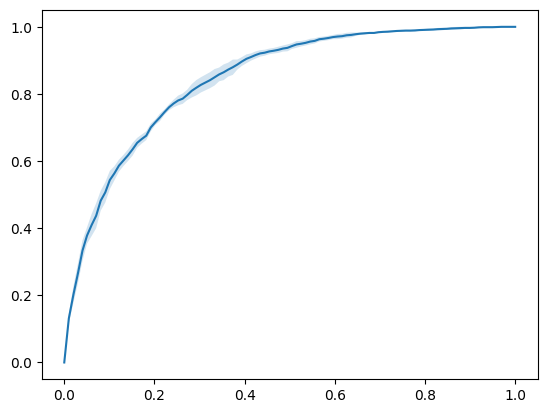

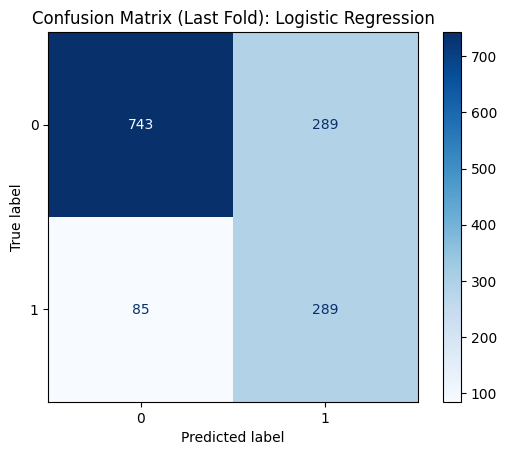

Evaluating Random Forest with 5-Fold CV...
Random Forest - Accuracy: 0.7897 ± 0.0063
Precision: 0.6422 ± 0.0239
Recall: 0.4741 ± 0.0087
F1 Score: 0.5451 ± 0.0063
ROC-AUC: 0.8215 ± 0.0034


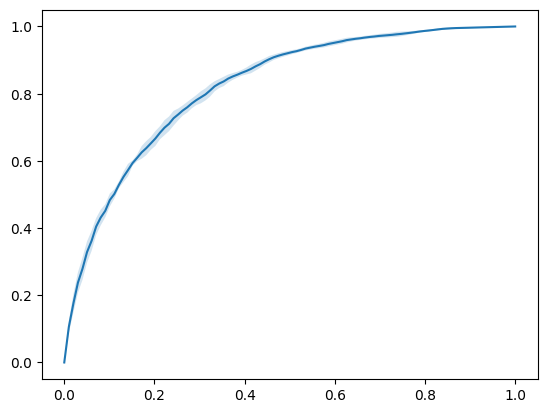

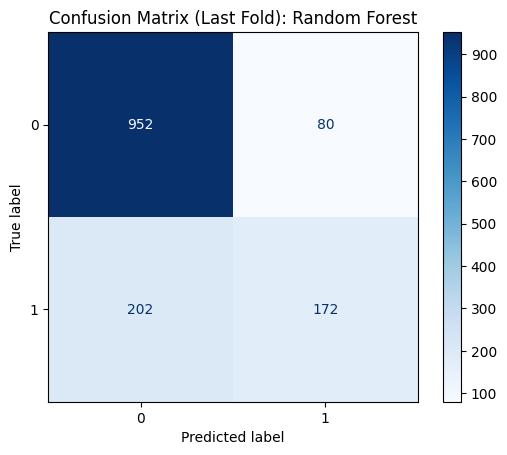

Evaluating Hist Gradient Boosting with 5-Fold CV...
Hist Gradient Boosting - Accuracy: 0.7956 ± 0.0075
Precision: 0.6415 ± 0.0212
Recall: 0.5259 ± 0.0141
F1 Score: 0.5777 ± 0.0120
ROC-AUC: 0.8361 ± 0.0042


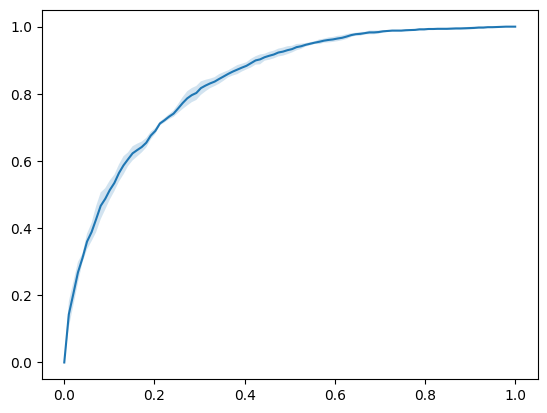

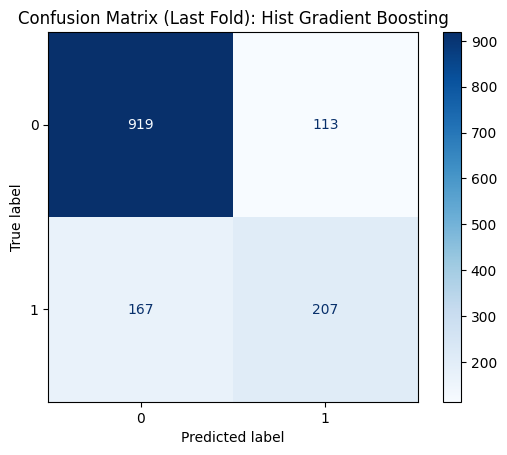

Evaluating SVM with 5-Fold CV...
SVM - Accuracy: 0.7467 ± 0.0078
Precision: 0.5156 ± 0.0100
Recall: 0.7833 ± 0.0148
F1 Score: 0.6218 ± 0.0098
ROC-AUC: 0.8239 ± 0.0065


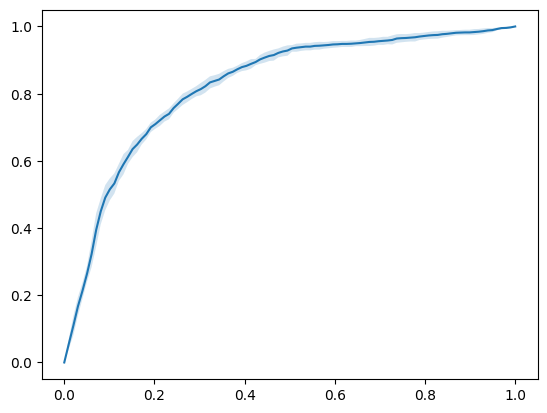

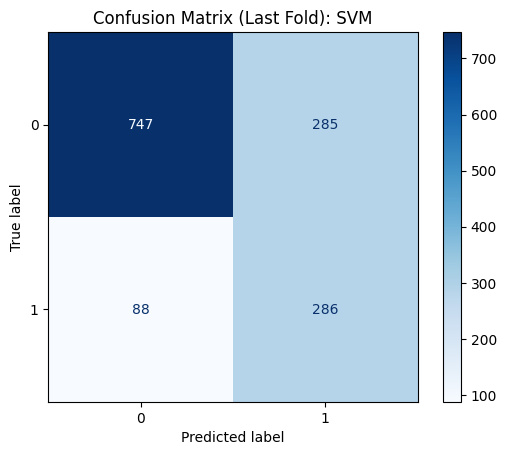

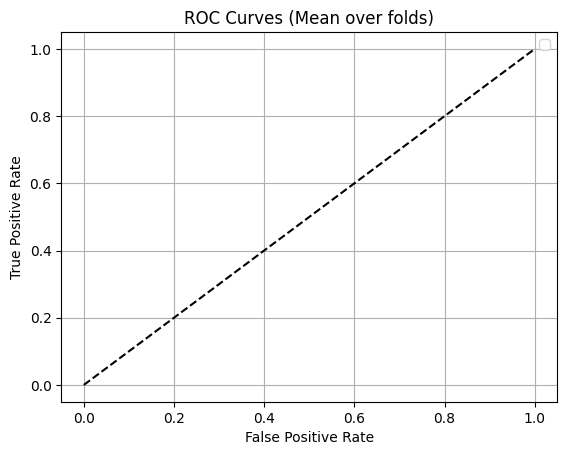

In [220]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"Evaluating {name} with 5-Fold CV...")

    # Lists to store metrics for each fold
    accs, precs, recs, f1s, aucs = [], [], [], [], []
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []  # To interpolate TPR for ROC curves

    # For confusion matrix, store last fold's y_true and preds
    last_y_val, last_preds = None, None

    for fold, (train_idx, val_idx) in enumerate(kf.split(X, y), 1):
        X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
        y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

        pipeline = Pipeline([
            ("preprocessing", preprocessor),
            ("classifier", model)
        ])

        pipeline.fit(X_train_fold, y_train_fold)
        preds = pipeline.predict(X_val_fold)
        probas = pipeline.predict_proba(X_val_fold)[:, 1]

        accs.append(accuracy_score(y_val_fold, preds))
        precs.append(precision_score(y_val_fold, preds))
        recs.append(recall_score(y_val_fold, preds))
        f1s.append(f1_score(y_val_fold, preds))
        aucs.append(roc_auc_score(y_val_fold, probas))

        # ROC curve interpolation
        fpr, tpr, _ = roc_curve(y_val_fold, probas)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)

        # Save last fold's confusion matrix data
        if fold == kf.n_splits:
            last_y_val, last_preds = y_val_fold, preds

    # Print average metrics
    print(f"{name} - Accuracy: {np.mean(accs):.4f} ± {np.std(accs):.4f}")
    print(f"Precision: {np.mean(precs):.4f} ± {np.std(precs):.4f}")
    print(f"Recall: {np.mean(recs):.4f} ± {np.std(recs):.4f}")
    print(f"F1 Score: {np.mean(f1s):.4f} ± {np.std(f1s):.4f}")
    print(f"ROC-AUC: {np.mean(aucs):.4f} ± {np.std(aucs):.4f}")

    # Plot mean ROC curve with std shading
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    std_tpr = np.std(tprs, axis=0)

    plt.plot(mean_fpr, mean_tpr, label=f"{name} (AUC={np.mean(aucs):.3f})")
    plt.fill_between(mean_fpr, mean_tpr - std_tpr, mean_tpr + std_tpr, alpha=0.2)

    # Plot confusion matrix for last fold
    cm = confusion_matrix(last_y_val, last_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix (Last Fold): {name}")
    plt.show()

plt.plot([0, 1], [0, 1], "k--")  # Diagonal line for ROC
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (Mean over folds)")
plt.legend()
plt.grid(True)
plt.show()


In [221]:
import pandas as pd

X_train_transformed = preprocessor.transform(X_train)

feature_names = preprocessor.get_feature_names_out()  # sklearn 1.0+ to get output feature names

df_train_transformed = pd.DataFrame(X_train_transformed, columns=feature_names)

df_train_transformed.head()

,binary__gender,binary__Partner,binary__Dependents,binary__PhoneService,binary__PaperlessBilling,multi_cat__MultipleLines_No,multi_cat__MultipleLines_No phone service,multi_cat__MultipleLines_Yes,multi_cat__InternetService_DSL,multi_cat__InternetService_Fiber optic,...,multi_cat__StreamingMovies_No internet service,multi_cat__StreamingMovies_Yes,multi_cat__PaymentMethod_Bank transfer (automatic),multi_cat__PaymentMethod_Credit card (automatic),multi_cat__PaymentMethod_Electronic check,multi_cat__PaymentMethod_Mailed check,contract_ord__Contract,num_scaler__tenure,num_scaler__MonthlyCharges,num_scaler__TotalCharges
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.325445,0.990969,1.678193
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.263534,-0.974037,-0.558322
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.447675,0.845599,1.775019
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.200624,0.648430,-0.906633
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.673557,-0.810287,-0.094653


In [222]:
import numpy as np
import pandas as pd

def get_feature_names_from_column_transformer(column_transformer):
    feature_names = []

    for name, transformer, columns in column_transformer.transformers_:
        if name == 'remainder':
            continue
        if hasattr(transformer, 'get_feature_names_out'):
            # For sklearn >= 1.0
            try:
                names = transformer.get_feature_names_out(columns)
            except TypeError:
                # Some transformers don't accept input features in get_feature_names_out
                names = transformer.get_feature_names_out()
        elif hasattr(transformer, 'get_feature_names'):
            names = transformer.get_feature_names(columns)
        else:
            # fallback: just use the columns as is
            names = columns
        feature_names.extend(names)

    return feature_names

# Assuming `preprocessor` is already fitted on your training data,
# and `shap_values` is your shap output from your model (2D array, shape: [samples, features])

# Extract feature names after preprocessing
feature_names = get_feature_names_from_column_transformer(preprocessor)

# Verify lengths match
print(f"Number of features from transformer: {len(feature_names)}")
print(f"Number of features in SHAP values: {shap_values.shape[1]}")

assert len(feature_names) == shap_values.shape[1], "Feature names count and SHAP values dimension must match!"

# Create DataFrame of features and mean absolute SHAP importance
shap_df = pd.DataFrame({
    "feature": feature_names,
    "importance": np.abs(shap_values).mean(axis=0)
})

# Sort by importance descending
shap_df = shap_df.sort_values(by="importance", ascending=False)

# Display top 20 features
print(shap_df.head(20))


Number of features from transformer: 37
Number of features in SHAP values: 37
                                feature  importance
34                               tenure    1.117660
33                             Contract    0.587154
36                         TotalCharges    0.539690
35                       MonthlyCharges    0.505006
9           InternetService_Fiber optic    0.331005
8                   InternetService_DSL    0.264401
25                      StreamingTV_Yes    0.126517
4                      PaperlessBilling    0.124860
28                  StreamingMovies_Yes    0.122259
31       PaymentMethod_Electronic check    0.114625
2                            Dependents    0.113090
5                      MultipleLines_No    0.111102
11                    OnlineSecurity_No    0.109488
20                       TechSupport_No    0.100979
23                       StreamingTV_No    0.075686
26                   StreamingMovies_No    0.074029
24      StreamingTV_No internet servic

In [223]:
import numpy as np
import pandas as pd

# Calculate mean absolute SHAP value per feature
mean_abs_shap = np.abs(shap_values).mean(axis=0)

# Create the DataFrame
shap_importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": mean_abs_shap
}).sort_values(by="importance", ascending=False)

print(shap_importance_df)


                                    feature  importance
34                                   tenure    1.117660
33                                 Contract    0.587154
36                             TotalCharges    0.539690
35                           MonthlyCharges    0.505006
9               InternetService_Fiber optic    0.331005
8                       InternetService_DSL    0.264401
25                          StreamingTV_Yes    0.126517
4                          PaperlessBilling    0.124860
28                      StreamingMovies_Yes    0.122259
31           PaymentMethod_Electronic check    0.114625
2                                Dependents    0.113090
5                          MultipleLines_No    0.111102
11                        OnlineSecurity_No    0.109488
20                           TechSupport_No    0.100979
23                           StreamingTV_No    0.075686
26                       StreamingMovies_No    0.074029
24          StreamingTV_No internet service    0

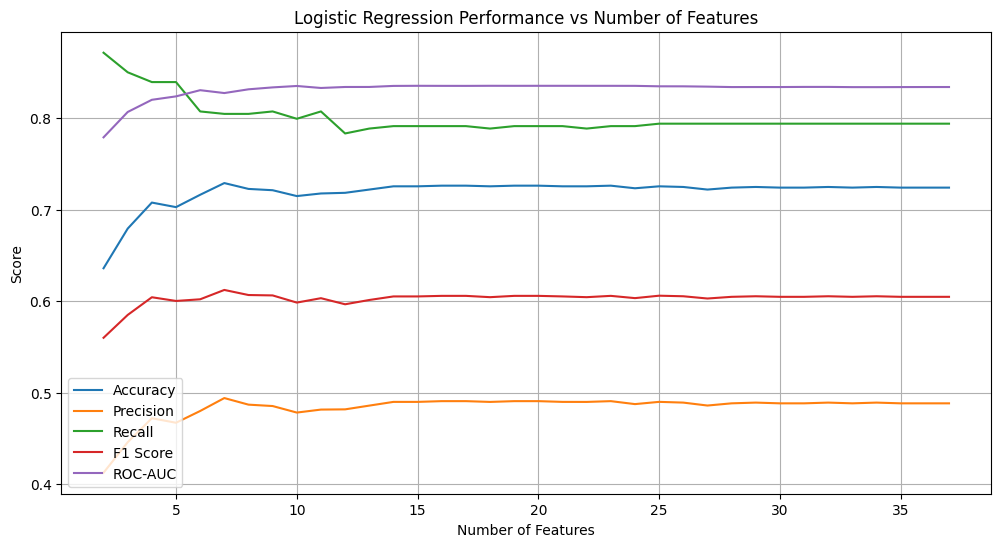

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# --- Assuming these exist already ---
# X_train, X_val, y_train, y_val: your train/val split original dataframes/series
# preprocessor: your fitted ColumnTransformer pipeline (with BinaryMapper, OneHotEncoder, etc)
# shap_importance_df: DataFrame with columns ['feature', 'importance'] sorted descending by importance

# 1) Extract transformed feature names in correct order:

binary_cols = ["gender", "Partner", "Dependents", "PhoneService", "PaperlessBilling"]
multi_cat_cols = [
    "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaymentMethod"
]
ordinal_cols = ["Contract"]
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

# BinaryMapper outputs columns named exactly as binary_cols
feature_names = []
feature_names.extend(binary_cols)

# Get one-hot encoded feature names
ohe = preprocessor.named_transformers_['multi_cat']
ohe_feature_names = ohe.get_feature_names_out(multi_cat_cols)
feature_names.extend(ohe_feature_names)

# Add ordinal and numeric feature names
feature_names.extend(ordinal_cols)
feature_names.extend(numeric_cols)

# 2) Transform train and validation sets once
X_train_transformed = preprocessor.transform(X_train)
X_val_transformed = preprocessor.transform(X_val)

# 3) Helper to select transformed columns by feature names
def select_transformed_features(X_trans, selected_feats, all_feats):
    indices = [all_feats.index(feat) for feat in selected_feats]
    return X_trans[:, indices]

# 4) Sort features by importance (assuming shap_importance_df is sorted descending)
sorted_features = shap_importance_df['feature'].tolist()

# 5) Loop over increasing number of features and train logistic regression
results = []

for i in range(2, len(sorted_features)+1):
    selected_feats = sorted_features[:i]

    X_train_sel = select_transformed_features(X_train_transformed, selected_feats, feature_names)
    X_val_sel = select_transformed_features(X_val_transformed, selected_feats, feature_names)

    model = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
    model.fit(X_train_sel, y_train)

    preds = model.predict(X_val_sel)
    probas = model.predict_proba(X_val_sel)[:, 1]

    results.append({
        "n_features": i,
        "accuracy": accuracy_score(y_val, preds),
        "precision": precision_score(y_val, preds),
        "recall": recall_score(y_val, preds),
        "f1": f1_score(y_val, preds),
        "roc_auc": roc_auc_score(y_val, probas)
    })

# 6) Plot the results
df_results = pd.DataFrame(results)

plt.figure(figsize=(12, 6))
plt.plot(df_results['n_features'], df_results['accuracy'], label='Accuracy')
plt.plot(df_results['n_features'], df_results['precision'], label='Precision')
plt.plot(df_results['n_features'], df_results['recall'], label='Recall')
plt.plot(df_results['n_features'], df_results['f1'], label='F1 Score')
plt.plot(df_results['n_features'], df_results['roc_auc'], label='ROC-AUC')
plt.xlabel("Number of Features")
plt.ylabel("Score")
plt.title("Logistic Regression Performance vs Number of Features")
plt.legend()
plt.grid(True)
plt.show()
